In [1]:
!pip install seaborn scikit-learn

In [2]:
# Step 1: Import Required Libraries

In [3]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_style("whitegrid")

In [4]:
# Step 2: Load Dataset

In [5]:
# Load Titanic dataset from seaborn

df = sns.load_dataset('titanic')
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
# Step 3: Basic Information

In [7]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [8]:
cols_to_drop = ['alive', 'who', 'adult_male', 'embark_town']

for col in cols_to_drop:
    if col in df.columns:
        df = df.drop(columns=col)

In [9]:
# Step 4: Handle Missing Values

In [10]:
# Check missing values
df.isnull().sum()

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
class         0
deck        688
alone         0
dtype: int64

In [11]:
# Fill Age
if 'Age' in df.columns:
    df['Age'] = df['Age'].fillna(df['Age'].median())

if 'age' in df.columns:
    df['age'] = df['age'].fillna(df['age'].median())

# Fill Embarked
if 'Embarked' in df.columns:
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

if 'embarked' in df.columns:
    df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

# Drop Cabin or deck safely
df = df.drop(columns=['Cabin','deck'], errors='ignore')

# Check again
df.isnull().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
class       0
alone       0
dtype: int64

In [12]:

# Fill age with median
if 'age' in df.columns:
    df['age'] = df['age'].fillna(df['age'].median())

# Fill embarked with mode
if 'embarked' in df.columns:
    df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

# Drop deck column (too many missing)
if 'deck' in df.columns:
    df = df.drop(columns=['deck'])

df.isnull().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
class       0
alone       0
dtype: int64

In [13]:
# Step 5: Feature Engineering
df['family_size'] = df['sibsp'] + df['parch'] + 1


df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,alone,family_size
0,0,3,male,22.0,1,0,7.2500,S,Third,False,2
1,1,1,female,38.0,1,0,71.2833,C,First,False,2
2,1,3,female,26.0,0,0,7.9250,S,Third,True,1
3,1,1,female,35.0,1,0,53.1000,S,First,False,2
4,0,3,male,35.0,0,0,8.0500,S,Third,True,1


In [14]:
df = pd.get_dummies(df, drop_first=True)

df.head()

,survived,pclass,age,sibsp,parch,fare,alone,family_size,sex_male,embarked_Q,embarked_S,class_Second,class_Third
0,0,3,22.0,1,0,7.2500,False,2,True,False,True,False,True
1,1,1,38.0,1,0,71.2833,False,2,False,False,False,False,False
2,1,3,26.0,0,0,7.9250,True,1,False,False,True,False,True
3,1,1,35.0,1,0,53.1000,False,2,False,False,True,False,False
4,0,3,35.0,0,0,8.0500,True,1,True,False,True,False,True


In [15]:
# Survival Count

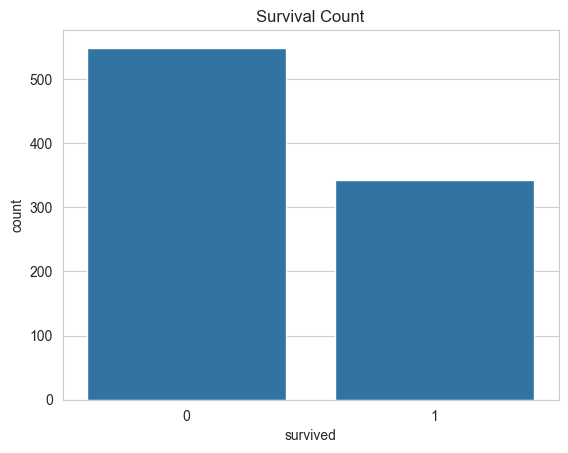

In [16]:
sns.countplot(x='survived', data=df)
plt.title("Survival Count")
plt.show()


In [17]:
# Age Distribution (Histogram)

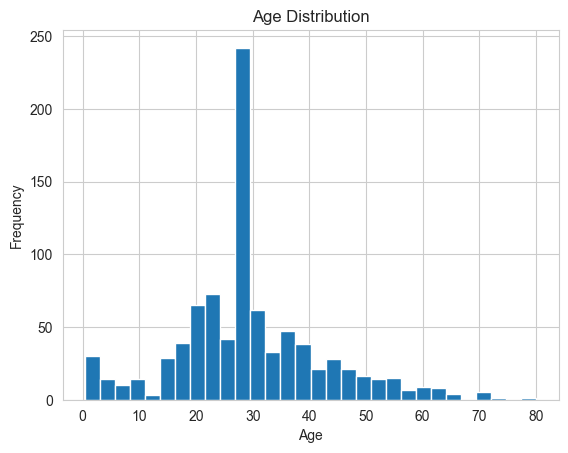

In [18]:
plt.hist(df['age'], bins=30)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

In [19]:
# Boxplot

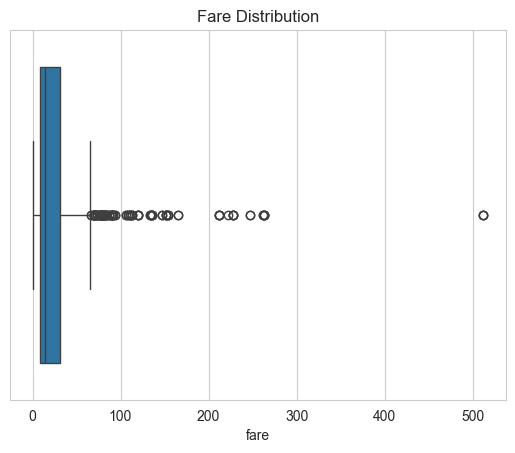

In [20]:
sns.boxplot(x=df['fare'])
plt.title("Fare Distribution")
plt.show()

In [21]:
# Correlation Heatmap

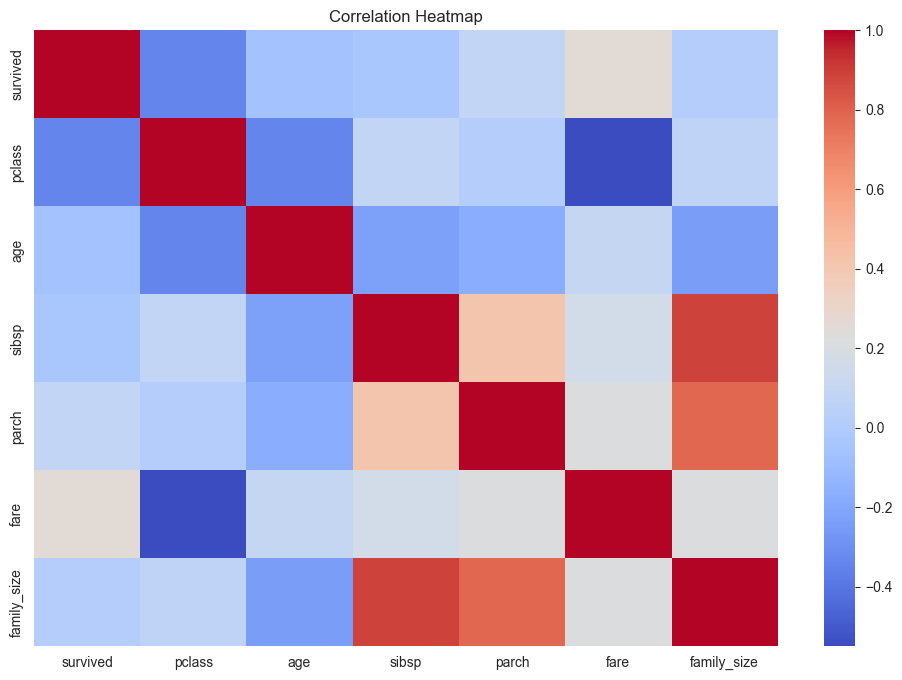

In [22]:
plt.figure(figsize=(12,8))

numeric_df = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_df.corr(), cmap='coolwarm')

plt.title("Correlation Heatmap")
plt.show()

In [23]:
X = df.drop('survived', axis=1)
y = df['survived']

# Train Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [24]:
# Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=3000)
model.fit(X_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [26]:
# Prediction
y_pred = model.predict(X_test)

In [27]:
# Evaluation

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7932960893854749

Confusion Matrix:
 [[90 15]
 [22 52]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.86      0.83       105
           1       0.78      0.70      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179

